In [120]:
'''
Basic Image enhancements using mathematical operations

We will look into some of the basic operations used in computer vision pipelines

1) Arthmetic operation lik addition, multiplication

2) Thresholding and masking

3) Bitwise operations like OR, AND, XOR
'''

import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline
from IPython.display import Image


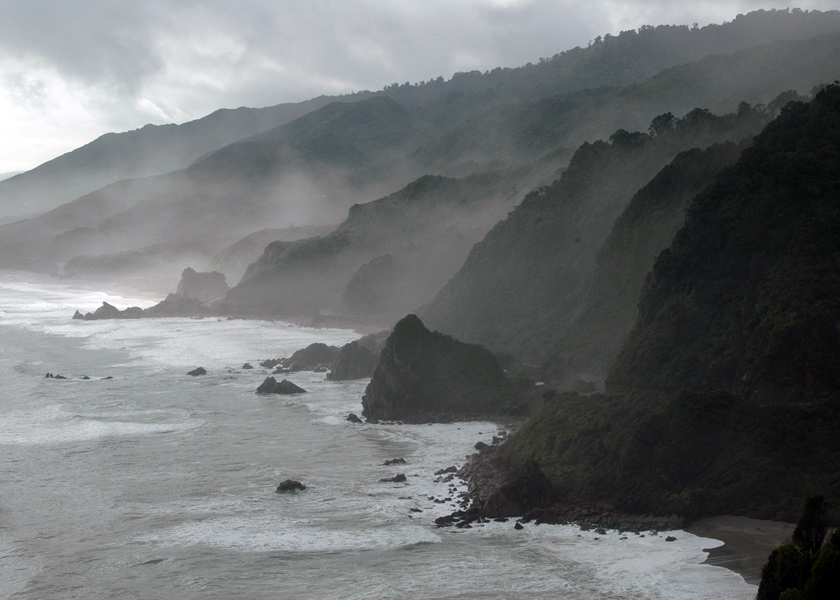

In [121]:
# Original Image

img_bgr = cv2.imread("New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

Image(filename='New_Zealand_Coast.jpg')



[[[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 ...

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]]
Next
[[[174 183 188]
  [176 183 189]
  [174 181 189]
  ...
  [163 170 176]
  [164 171 177]
  [167 172 176]]

 [[176 183 189]
  [176 183 189]
  [175 182 190]
  ...
  [166 171 177]
  [167 172 178]
  [164 169 173]]

 [[173 180 186]
  [173 180 188]
  [172 181 188]
  ...
  [166 171 175]
  [166 171 175]
  [165 170 174]]

 ...

 [[153 157 156]
  [151 155 154]
  [150 150 152]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[149 153 154]
  [149 153 154]
  [152 152 154]
  .

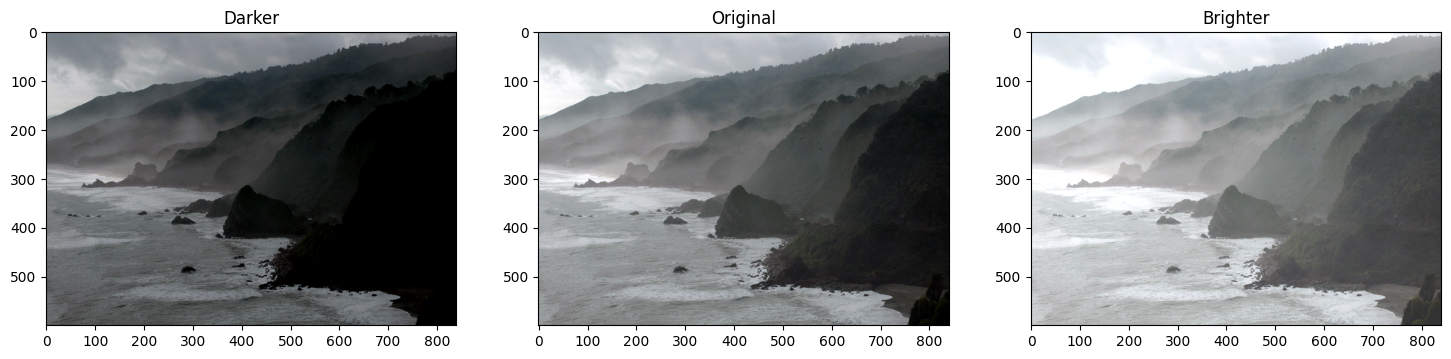

In [122]:
# Addition of Brightness


# Global increase in brightness bt addition

matrix = np.ones(img_rgb.shape, dtype='uint8') * 50

'''
Value will be clipped no need to worry
'''

print(matrix)
print("Next")
print(img_rgb)

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

print("Next 2")
print(img_rgb_brighter)


plt.figure(figsize=[18,5])


plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Brighter");



Text(0.5, 1.0, 'Original')

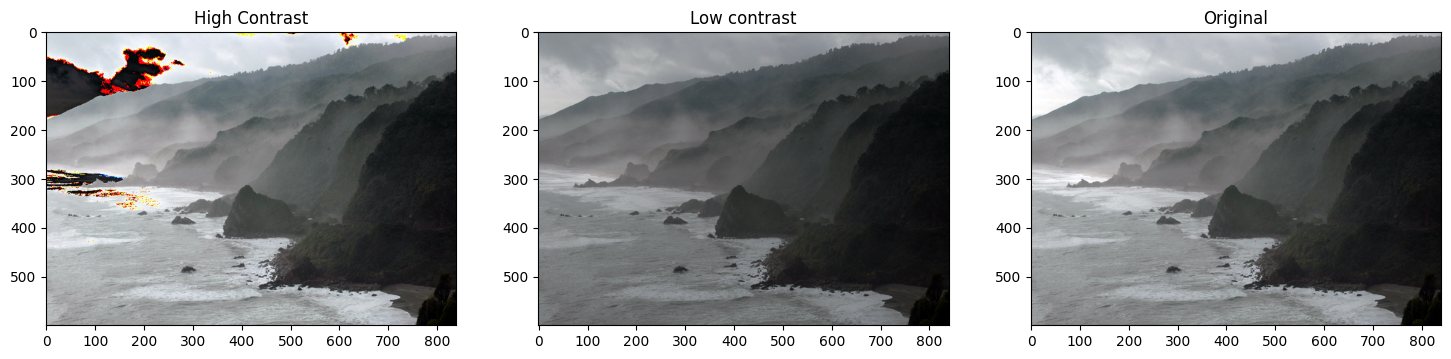

In [123]:
## Multiplication and contrast

'''
Multiplication improve t he contrast of the image.
Contrast is the difference in the intensity  of pixel. Multplying the intensity values with a constant can make the differece larger or smaller
'''


matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))


# Show the images

plt.figure(figsize=[18,5])

plt.subplot(131)
plt.imshow(img_rgb_brighter)
plt.title("High Contrast")

plt.subplot(132)
plt.imshow(img_rgb_darker)
plt.title('Low contrast')

plt.subplot(133)
plt.imshow(img_rgb)
plt.title("Original")



Text(0.5, 1.0, 'High Contrast')

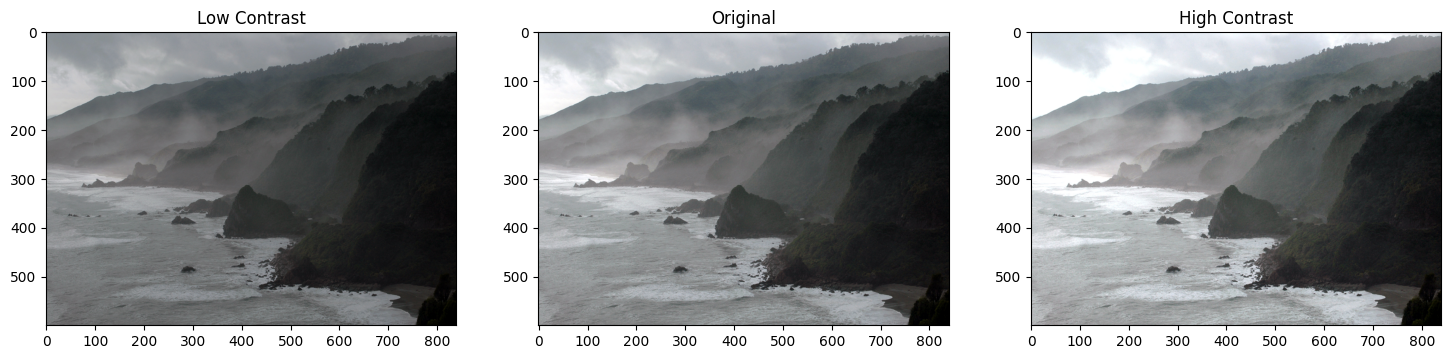

In [124]:
'''
Overflow problem with the above the image
'''

matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_lower = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2),0,255))

plt.figure(figsize=[18,5])

plt.subplot(131)
plt.imshow(img_rgb_lower)
plt.title("Low Contrast")

plt.subplot(132)
plt.imshow(img_rgb)
plt.title("Original")

plt.subplot(133)
plt.imshow(img_rgb_higher)
plt.title("High Contrast")





(572, 800)


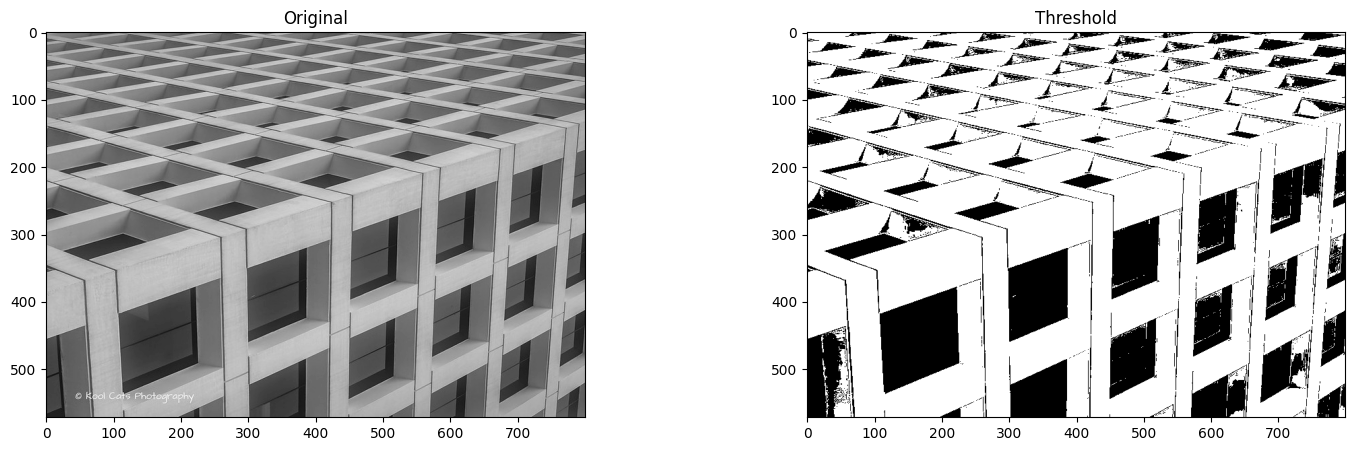

In [125]:
'''
Image Thresholding

Binary images have lots of use cases in image processing.
1) One of which is of creating masks


Image masks allow us to process on specific parts of an image keeping the othe parts intact 

-> Image thresholding is used to create binary images from grayscale images
-> Can use different thresholds to create different binary images from same original image 
'''

img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
print(img_read.shape)

retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)


plt.figure(figsize=[18,5])
plt.subplot(121)
plt.title("Original")
plt.imshow(img_read, cmap='gray')

plt.subplot(122)
plt.title("Threshold")
plt.imshow(img_thresh, cmap='gray')



Text(0.5, 1.0, 'Adaptive - Gausiian')

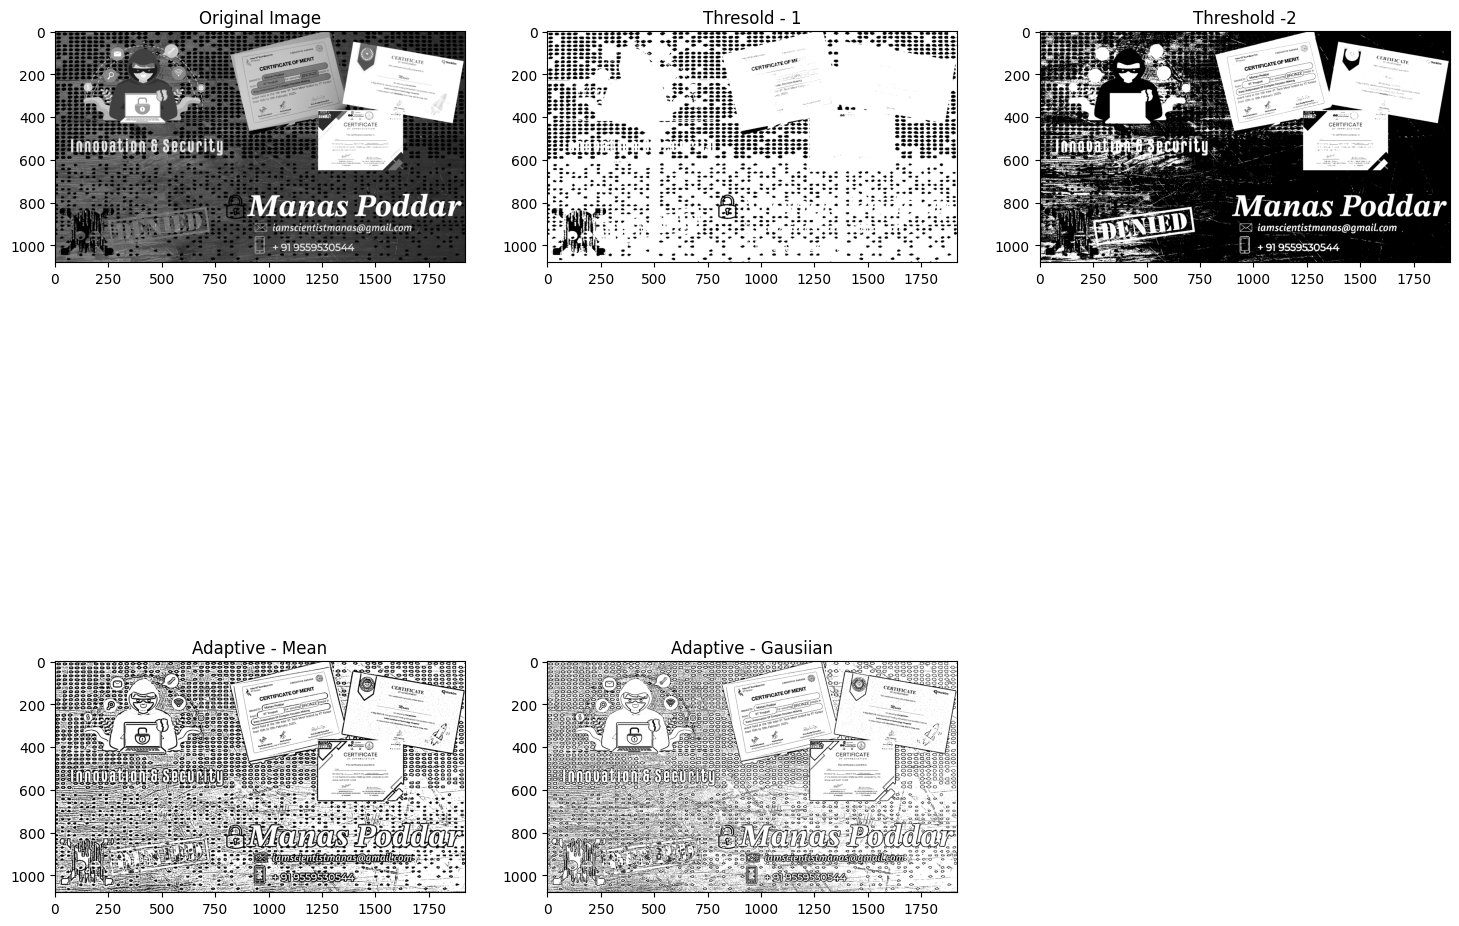

In [126]:
'''
Applications in sheet music reader
'''


img_read = cv2.imread("273441167-d0f7235a-1a2f-40c8-a451-44505b396f0e.png", cv2.IMREAD_GRAYSCALE)

retval, img_thresh_gbl_1 = cv2.threshold(img_read,10,255,cv2.THRESH_BINARY)

retval, img_thresh_gbl_2 = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

img_thresh_adaptive_mean = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,7)

img_thresh_adaptive_gaussia = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,7)

# show the images

plt.figure(figsize=[18,15])


plt.subplot(231)
plt.imshow(img_read, cmap="gray")
plt.title('Original Image')

plt.subplot(232)
plt.imshow(img_thresh_gbl_1, cmap="gray")
plt.title("Thresold - 1")

plt.subplot(233)
plt.imshow(img_thresh_gbl_2, cmap="gray")
plt.title("Threshold -2")

plt.subplot(234)
plt.imshow(img_thresh_adaptive_mean, cmap="gray")
plt.title("Adaptive - Mean")

plt.subplot(235)
plt.imshow(img_thresh_adaptive_gaussia, cmap="gray")
plt.title("Adaptive - Gausiian")





Text(0.5, 1.0, 'Circle Iamge')

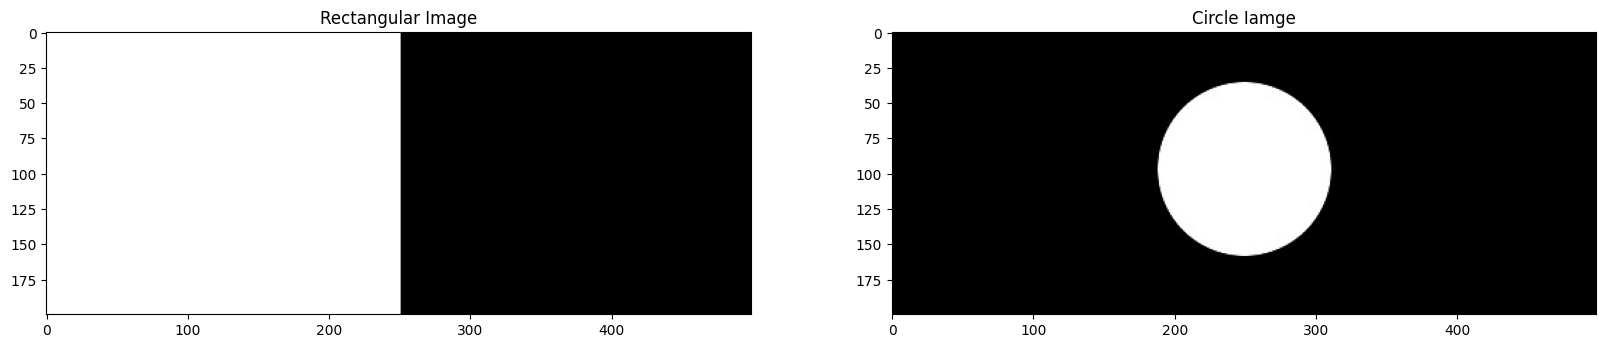

In [127]:
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_COLOR)

img_cir = cv2.imread("circle.jpg", cv2.IMREAD_COLOR)


plt.figure(figsize=[20,5])

plt.subplot(121)
plt.imshow(img_rec)
plt.title('Rectangular Image')

plt.subplot(122)
plt.imshow(img_cir)
plt.title("Circle Iamge")



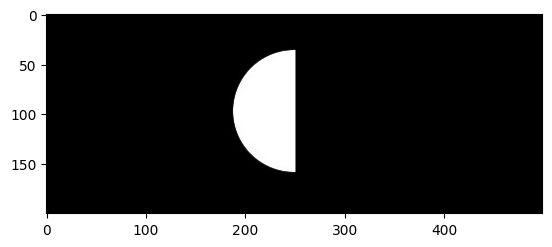

In [128]:
# Bitwise And

result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result)




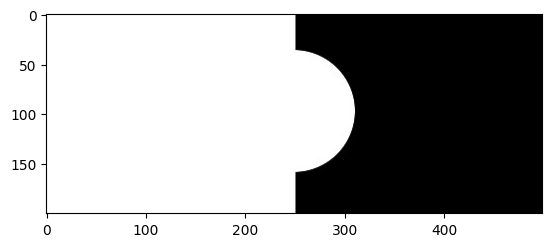

In [129]:
# Bitwise Or

result = cv2.bitwise_or(img_cir, img_rec, mask=None)
plt.imshow(result)

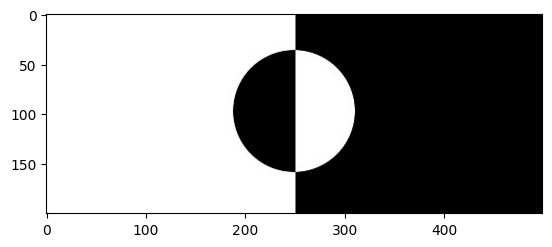

In [130]:
# Bitsise XOR

result = cv2.bitwise_xor(img_cir, img_rec,mask=None)
plt.imshow(result)

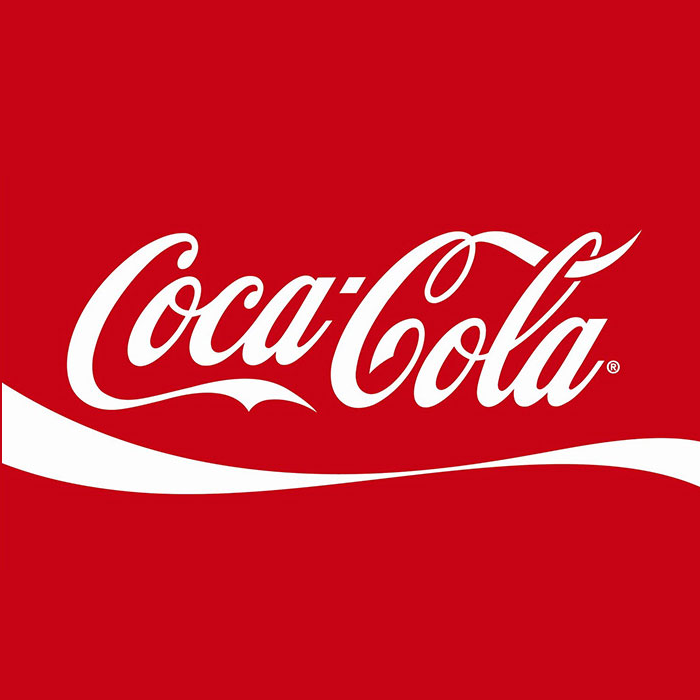

In [131]:
## Logo Manipulation


Image(filename='coca-cola-logo.png')


(700, 700, 3)


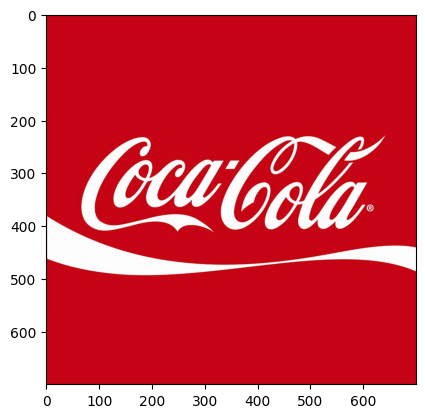

In [132]:
# Reading the foreground information

img_bgr = cv2.imread('coca-cola-logo.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
print(img_rgb.shape)

logo_h = img_rgb.shape[0]
logo_w = img_rgb.shape[1]



(700, 700, 3)


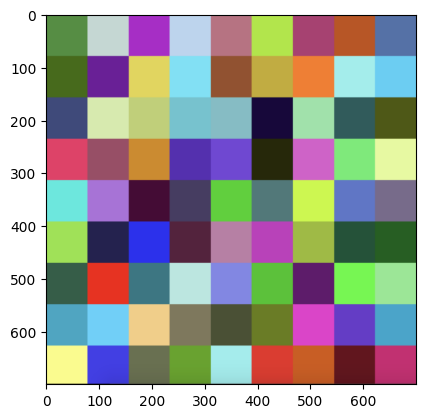

In [133]:
# Read Background images

img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr,  cv2.COLOR_BGR2RGB)  # Convert to RGB color space

aspect_ratio = logo_w/img_background_rgb.shape[1]

dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

# Resize the image while keeping the aspect ratio
img_background_rgb = cv2.resize(img_background_rgb, dsize=dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)



(700, 700)


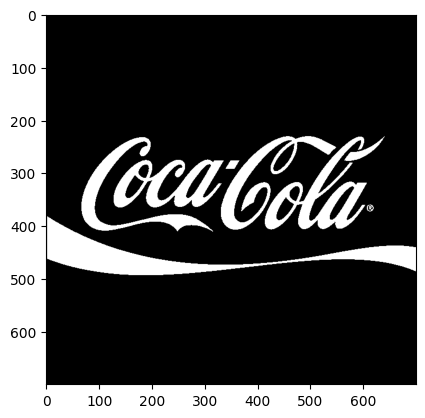

In [134]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap='gray')
print(img_mask.shape)

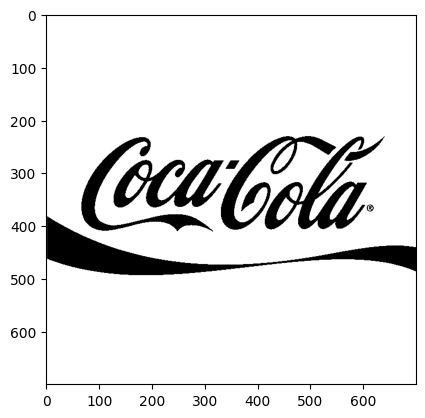

In [135]:
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap='gray')

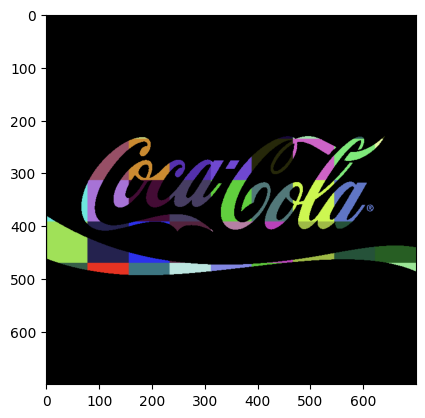

In [138]:

img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)


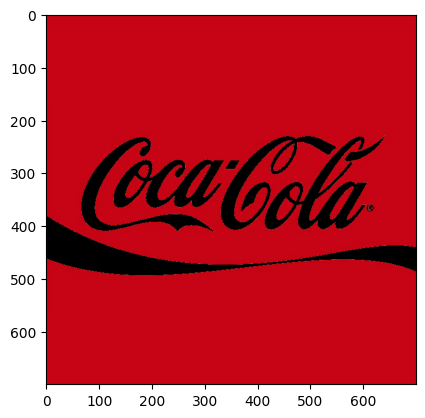

In [139]:
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv
)

plt.imshow(img_foreground)

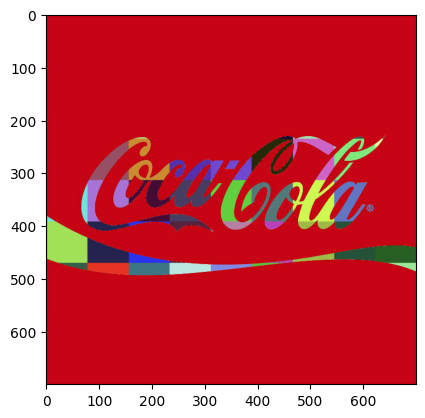

In [141]:
result = cv2.add(img_foreground, img_background)
plt.imshow(result)

In [ ]:
i